In [83]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('fivethirtyeight')

In [4]:
teams_df = pd.read_csv('../data/highest_earning_teams.csv')
teams = pd.read_csv('../data/highest_earning_teams.csv')
teams_df.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [6]:
teams['PrizePerTournament'] = round((teams['TotalUSDPrize'] / teams['TotalTournaments']), ndigits=2)
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,PrizePerTournament
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter,443571.43
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter,122395.12
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter,87367.69
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter,79085.23
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter,188333.33


In [71]:
team_colors_genre = ['firebrick', 'darkorange', 'forestgreen', 'dodgerblue', 'darkblue']

In [72]:
team_color_conditions = [
    (teams['Genre'] == 'Strategy'),
    (teams['Genre'] == 'Collectible Card Game'),
    (teams['Genre'] == 'First-Person Shooter'),
    (teams['Genre'] == 'Battle Royale'),
    (teams['Genre'] == 'Multiplayer Online Battle Arena')
]

In [73]:
teams['GenreColor'] = np.select(team_color_conditions, team_colors_genre)
teams.tail()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,PrizePerTournament,GenreColor
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena,3143.4,darkblue
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena,4000.0,darkblue
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena,3429.6,darkblue
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena,2500.0,darkblue
927,584,Swedish National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena,2500.0,darkblue


In [47]:
# Showing games, need to get number of players on each team
teams_grouped_by_tournament_count = teams.groupby('Game')['TotalTournaments'].sum()
teams_grouped_by_tournament_count = teams_grouped_by_tournament_count.sort_values()
teams_grouped_by_tournament_count

Game
Arena of Valor                        142
Hearthstone                           662
Overwatch                             772
PUBG                                  828
Fortnite                             1229
Heroes of the Storm                  1663
League of Legends                    2515
Dota 2                               2931
Counter-Strike: Global Offensive     5996
Starcraft II                        12676
Name: TotalTournaments, dtype: int64

In [48]:
colors_by_tournament_count = ['firebrick', 'forestgreen', 'darkblue', 'darkblue', 'darkblue', 'dodgerblue', 'dodgerblue', 'forestgreen', 'darkorange', 'darkblue'] 

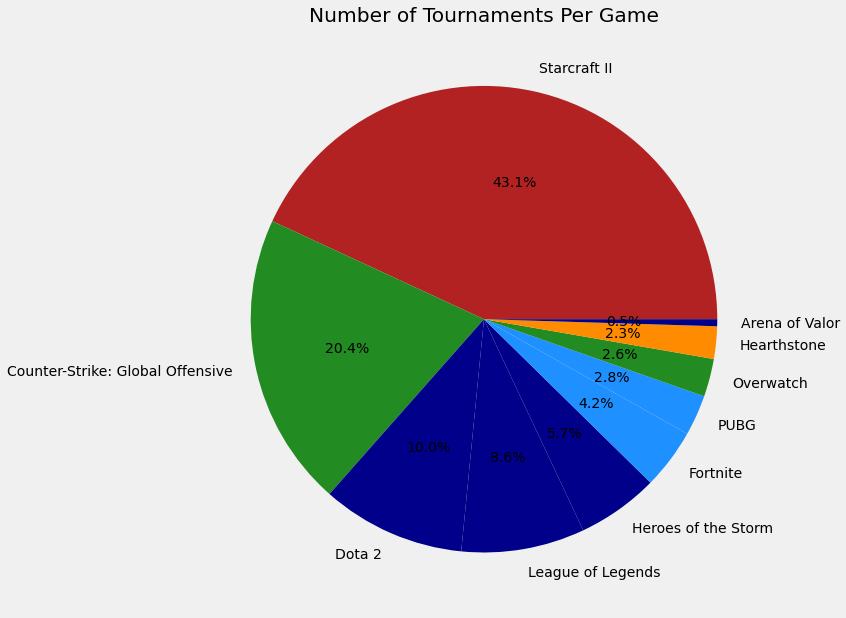

In [49]:
# Totals
ax = teams_grouped_by_tournament_count.sort_values(ascending=False).plot.pie(autopct='%1.1f%%', colors=colors_by_tournament_count)

ax.set_title('Number of Tournaments Per Game')
ax.set_ylabel('')

fig = ax.figure
fig.set_size_inches(18,10)
#fig.savefig('../images/pie_number_of_tournaments_share.png')

In [51]:
# Showing games, need to get number of players on each team
teams_grouped_by_game = teams.groupby('Game')['TotalUSDPrize'].sum()
teams_grouped_by_game = teams_grouped_by_game.sort_values()
teams_grouped_by_game

Game
Arena of Valor                      9.969149e+06
Heroes of the Storm                 1.071052e+07
Hearthstone                         1.086453e+07
PUBG                                1.671500e+07
Overwatch                           2.046527e+07
Starcraft II                        2.785615e+07
Fortnite                            3.466133e+07
League of Legends                   6.466556e+07
Counter-Strike: Global Offensive    8.485393e+07
Dota 2                              2.202828e+08
Name: TotalUSDPrize, dtype: float64

In [54]:
colors_by_game = ['darkblue', 'forestgreen', 'darkblue', 'dodgerblue', 'firebrick', 'forestgreen', 'dodgerblue', 'darkorange', 'darkblue', 'darkblue'] 

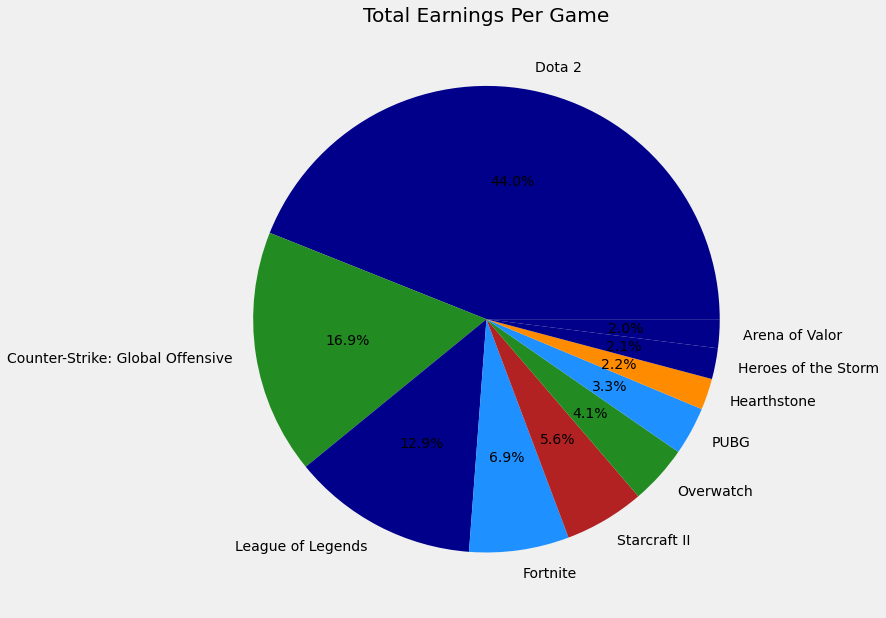

In [56]:
# Totals
ax = teams_grouped_by_game.sort_values(ascending=False).plot.pie(autopct='%1.1f%%', colors=colors_by_game)

ax.set_title('Total Earnings Per Game')
ax.set_ylabel('')

fig = ax.figure
fig.set_size_inches(18,10)
#fig.savefig('../images/average_team_prize_per_game.png')

In [91]:
df_teams = teams[['TotalUSDPrize', 'TotalTournaments', 'Game', 'Genre', 'PrizePerTournament', 'GenreColor']]
#df_teams.head()

In [92]:
moba = df_teams[df_teams['Genre'] == 'Multiplayer Online Battle Arena']
battle_royale = df_teams[df_teams['Genre'] == 'Battle Royale']
fps = df_teams[df_teams['Genre'] == 'First-Person Shooter']
card_game = df_teams[df_teams['Genre'] == 'Collectible Card Game']
strategy = df_teams[df_teams['Genre'] == 'Strategy']

In [113]:
moba_corr_matrix = moba.corr()
#sn.heatmap(moba_corr_matrix, annot=True)
#plt.show()

In [124]:
battle_royale_corr_matrix = battle_royale.corr()
#sn.heatmap(battle_royale_corr_matrix, annot=True)
#plt.show()
battle_royale.describe()

,TotalUSDPrize,TotalTournaments,PrizePerTournament
count,2.000000e+02,200.000000,200.000000
mean,2.568817e+05,10.285000,23767.907050
std,5.684191e+05,13.023897,37145.047033
min,1.200000e+03,1.000000,641.670000
25%,2.956598e+04,3.000000,5780.732500
50%,6.677191e+04,7.000000,11996.805000
75%,1.779086e+05,12.000000,25382.500000
max,3.708150e+06,105.000000,262500.000000


## Bootstrapping MOBA Games

In [157]:
bootstrap_moba_sample_means = pd.DataFrame({'mean_avg_prize': [moba.sample(10000, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [158]:
bottom_moba_bootstrap_mean = bootstrap_moba_sample_means.mean_avg_prize.quantile(0.025)
top_moba_bootstrap_mean = bootstrap_moba_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_moba_sample_means.mean_avg_prize.quantile(0.025), bootstrap_moba_sample_means.mean_avg_prize.quantile(0.975)

(32784.6207231752, 35244.67167375001)

[]

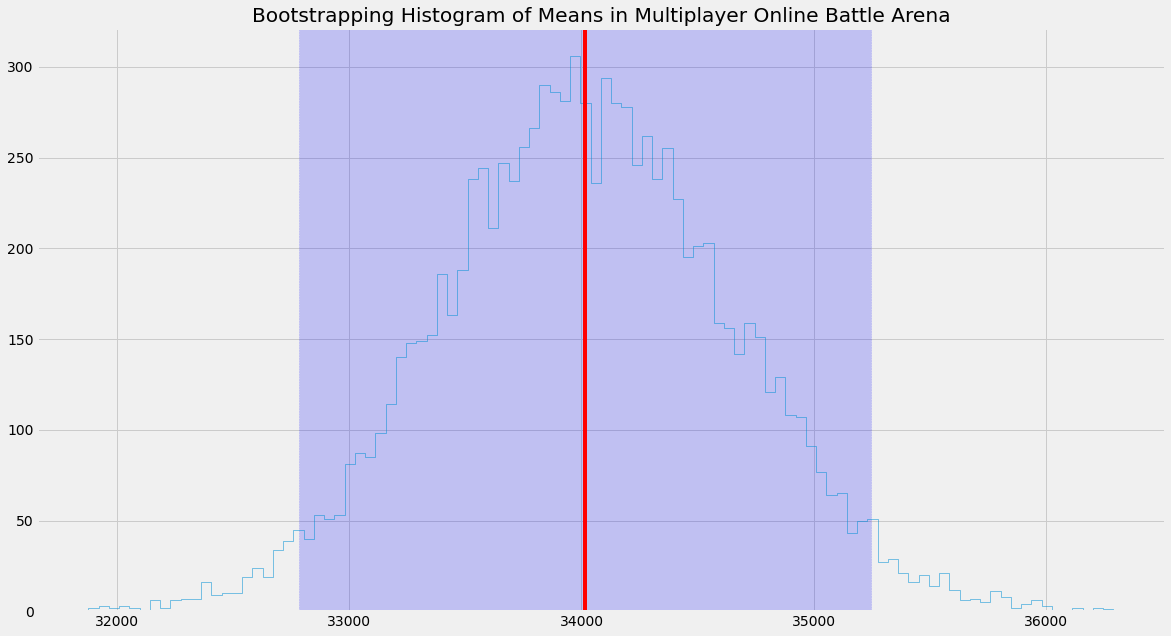

In [159]:
bootstrap_moba_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(moba.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_moba_bootstrap_mean, top_moba_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in Multiplayer Online Battle Arena')
plt.plot()
plt.savefig('../images/bootstrapping_moba.png')

## Bootstrapping FPS Games

In [155]:
fps_corr_matrix = fps.corr()
#sn.heatmap(fps_corr_matrix, annot=True)
#plt.savefig('../images/corr_matrix_fps.png')
#plt.show()
fps.sort_values(ascending=False, by='PrizePerTournament')

,TotalUSDPrize,TotalTournaments,Game,Genre,PrizePerTournament,GenreColor
0,3105000.00,7,Overwatch,First-Person Shooter,443571.43,forestgreen
16,250000.00,1,Overwatch,First-Person Shooter,250000.00,forestgreen
5,950000.00,4,Overwatch,First-Person Shooter,237500.00,forestgreen
4,1130000.00,6,Overwatch,First-Person Shooter,188333.33,forestgreen
6,755000.00,5,Overwatch,First-Person Shooter,151000.00,forestgreen
...,...,...,...,...,...,...
489,98935.21,52,Counter-Strike: Global Offensive,First-Person Shooter,1902.60,forestgreen
74,35491.54,19,Overwatch,First-Person Shooter,1867.98,forestgreen
477,132489.54,78,Counter-Strike: Global Offensive,First-Person Shooter,1698.58,forestgreen
67,44988.63,29,Overwatch,First-Person Shooter,1551.33,forestgreen


In [148]:
bootstrap_fps_sample_means = pd.DataFrame({'mean_avg_prize': [fps.sample(10000, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [150]:
bottom_fps_bootstrap_mean = bootstrap_fps_sample_means.mean_avg_prize.quantile(0.025)
top_fps_bootstrap_mean = bootstrap_fps_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_fps_sample_means.mean_avg_prize.quantile(0.025), bootstrap_fps_sample_means.mean_avg_prize.quantile(0.975)

(20978.52896895013, 22732.24620160019)

[]

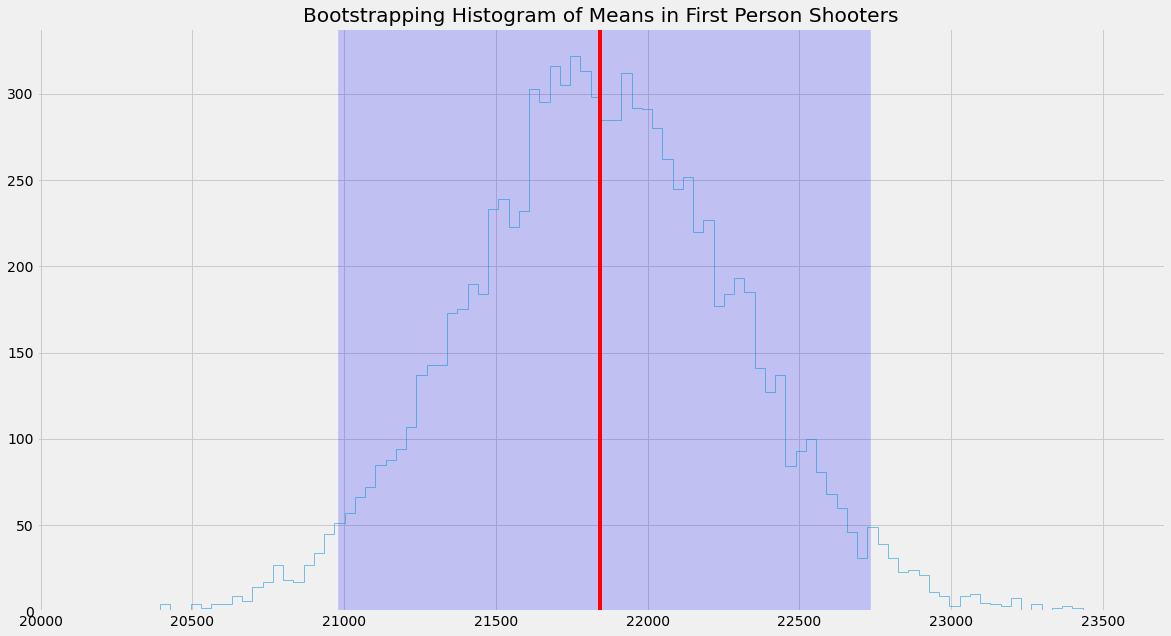

In [156]:
bootstrap_fps_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(fps.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_fps_bootstrap_mean, top_fps_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in First Person Shooters')
plt.plot()

In [153]:
fps.PrizePerTournament.median()

10967.525000000001

In [135]:
bootstrap_fps_sample_std = pd.DataFrame({'std_avg_prize': [fps.sample(10000, replace=True).PrizePerTournament.me for i in range(1000)]})

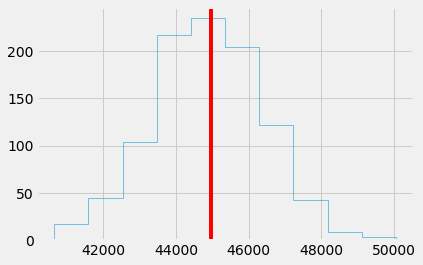

In [136]:
bootstrap_fps_sample_std.std_avg_prize.hist(histtype='step')
plt.axvline(fps.PrizePerTournament.std(), color = 'red')

In [137]:
fps.PrizePerTournament.describe()

count       200.000000
mean      21844.509200
std       44971.758438
min        1494.490000
25%        5543.305000
50%       10967.525000
75%       17909.117500
max      443571.430000
Name: PrizePerTournament, dtype: float64

In [125]:
card_game_corr_matrix = card_game.corr()
#sn.heatmap(card_game_corr_matrix, annot=True)
#plt.show()
card_game.describe()

,TotalUSDPrize,TotalTournaments,PrizePerTournament
count,8.000000e+01,80.000000,80.000000
mean,1.358066e+05,8.275000,12301.418000
std,2.824002e+05,11.001697,24021.086258
min,1.750000e+02,1.000000,100.000000
25%,1.900000e+03,1.000000,1500.000000
50%,9.859875e+03,4.000000,3366.725000
75%,1.305827e+05,9.000000,12573.347500
max,1.656840e+06,44.000000,175000.000000


In [126]:
strategy_corr_matrix = strategy.corr()
#sn.heatmap(strategy_corr_matrix, annot=True)
#plt.savefig('../images/corr_matrix_strategy.png')
#plt.show()
strategy.describe()

,TotalUSDPrize,TotalTournaments,PrizePerTournament
count,1.000000e+02,100.00000,100.000000
mean,2.785615e+05,126.76000,4434.143000
std,3.661822e+05,134.49217,17437.904444
min,3.149059e+04,1.00000,314.340000
25%,6.159307e+04,40.50000,1002.107500
50%,1.315836e+05,81.00000,1746.790000
75%,3.870215e+05,153.00000,3443.152500
max,2.546573e+06,808.00000,175000.000000


In [114]:
def bootstrap(x, resamples=10000):
    n_obs = x.shape[0]
    boot_samples = []
    for k in range(resamples):
        boot_idxs = np.random.randint(n_obs, size=n_obs)
        boot_sample = x[boot_idxs]
        boot_samples.append(boot_sample)
    return boot_samples

In [115]:
def bootstrap_confidence_interval(sample, stat_function=np.mean, resamples=1000, ci=95):
    boostrap_samples = bootstrap(sample, resamples=resamples)
    bootstrap_samples_stat = list(map(stat_function, boostrap_samples))
    low_bound = (100. - ci) / 2
    high_bound = 100. - low_bound
    lower_ci, upper_ci = np.percentile(bootstrap_samples_stat,
                                       [low_bound, high_bound])
    return lower_ci, upper_ci, bootstrap_samples_stat